# Análise dos Dados obtidos

## Limpar os dados

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

In [36]:
import os

path = os.getcwd().replace('/data_analysis', '') + '/data.txt'

In [37]:
# pegar valores aleatórios pra por no data_test.txt

import random

lista = list()
for i in range(0,10):
    lista.append(round(random.uniform(2.0, 5.0), 2))

print(lista)


[2.49, 2.75, 4.64, 3.26, 3.46, 2.71, 4.22, 3.55, 2.57, 2.66]


In [38]:
# f = open(path)
f = open('data_test.txt')

lines = list()
for data in f:
    lines.append(data)


# TAMPOP e MAX_INFO_LEN
TAMPOP = int(lines[1].split('\t')[0].split(' ')[2])
MAX_INFO_LEN = int(lines[1].split('\t')[1].split(' ')[2])

# fitness function
fitness = list()
for gen in range(0,100):
    try:
        fitness.append(lines[lines.index('Generation: ' + str(gen) + '\n') + 2].split())
    except ValueError:
        break

f.close()


## Criação dos eixos e modelos e plotagem

In [39]:
# eixo X
X = list()
for i in range(0,gen):
    X.append(i)

X = np.array(X)

In [40]:
# eixo Y (em andamento ainda)

y0 = list()
y1 = list()
y2 = list()
n0 = randrange(TAMPOP - 1)
n1 = randrange(TAMPOP - 1)
n2 = randrange(TAMPOP - 1)

for fit in fitness:
    y0.append(float(fit[n0]))
    y1.append(float(fit[n1]))
    y2.append(float(fit[n2]))

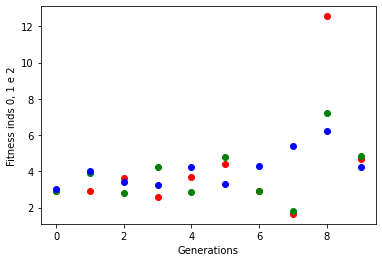

In [41]:
plt.scatter(X, y0, c='r')
plt.scatter(X, y1, c='g')
plt.scatter(X, y2, c='b')
plt.xlabel('Generations')
plt.ylabel('Fitness inds 0, 1 e 2')
plt.show()

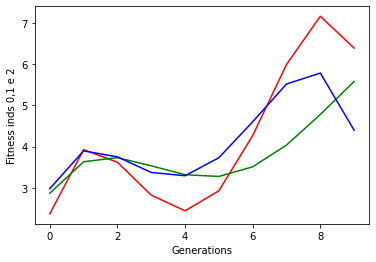

In [42]:
modelo0 = np.poly1d(np.polyfit(X, y0, 4))
modelo1 = np.poly1d(np.polyfit(X, y1, 4))
modelo2 = np.poly1d(np.polyfit(X, y2, 4))

my0 = modelo0(X)
my1 = modelo1(X)
my2 = modelo2(X)

plt.plot(X, my0, c='r')
plt.plot(X, my1, c='g')
plt.plot(X, my2, c='b')
plt.xlabel('Generations')
plt.ylabel('Fitness inds 0,1 e 2')
plt.show()

In [43]:
# TENTAR plotar todos os individuos

indivs = list()
indiv = list()
for i in range(0, TAMPOP):
    indiv.clear()
    for fit in fitness:
        indiv.append(float(fit[i]))
    indivs.append(indiv.copy())

print(indivs)


[[2.9, 3.9, 3.33, 4.82, 3.74, 3.09, 1.9, 3.53, 4.82, 4.74], [2.5, 3.5, 4.51, 3.02, 2.2, 2.47, 5.5, 2.51, 5.02, 4.2], [3.0, 4.0, 3.41, 3.23, 4.22, 3.29, 4.3, 5.41, 6.23, 4.22], [2.9, 3.9, 2.81, 4.23, 2.85, 4.78, 2.9, 1.81, 7.23, 4.85], [2.7, 3.7, 4.34, 4.65, 2.46, 4.04, 3.7, 9.34, 8.65, 4.46], [3.0, 3.0, 4.57, 4.95, 4.85, 3.05, 2.0, 2.57, 9.95, 4.85], [3.0, 3.0, 4.6, 2.38, 3.33, 4.16, 3.0, 1.6, 10.38, 4.33], [2.9, 2.9, 2.63, 3.57, 4.14, 2.57, 2.5, 1.63, 11.57, 4.14], [2.9, 2.9, 3.65, 2.56, 3.68, 4.42, 2.9, 1.65, 12.56, 4.68], [1.3, 1.3, 4.36, 3.15, 2.4, 2.77, 7.3, 1.36, 13.15, 4.4]]


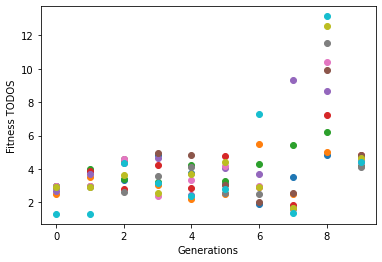

In [44]:
for pop in range(0, TAMPOP):
    y = indivs[pop]
    plt.scatter(X, y)
plt.xlabel('Generations')
plt.ylabel('Fitness TODOS')
plt.show()

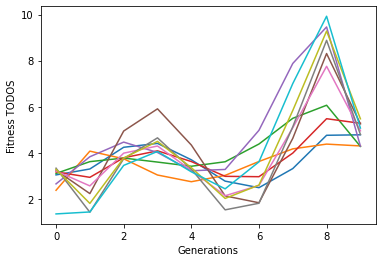

In [45]:
for pop in range(0, TAMPOP):
    y = indivs[pop]
    modelo = np.poly1d(np.polyfit(X, y, 5))
    y = modelo(X)
    plt.plot(X, y)
plt.xlabel('Generations')
plt.ylabel('Fitness TODOS')
plt.show()

In [46]:
maior = sorted([float(elem) for elem in fitness[gen - 1]])[TAMPOP - 1]
melhor = fitness[gen - 1].index(str(maior))

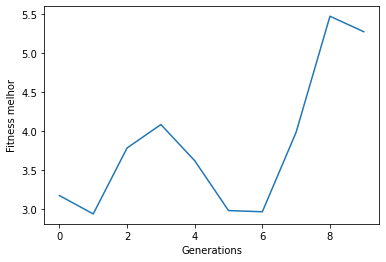

In [47]:
y = indivs[melhor]
modelo = np.poly1d(np.polyfit(X, y, 5))
y = modelo(X)
plt.plot(X, y)
plt.xlabel('Generations')
plt.ylabel('Fitness melhor')
plt.show()

In [48]:
media = list()
media2 = list()
soma = 0
soma2 = 0
for fit in fitness:
    soma = 0
    soma2 = 0
    for i in range(0, TAMPOP):
        soma += float(fit[i])
        if i != melhor:
            soma2 += float(fit[i])
    media.append(round((soma)/(TAMPOP), 2))
    media2.append(round((soma2)/(TAMPOP - 1), 2))


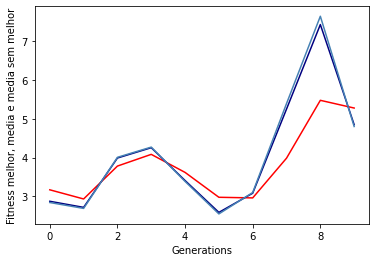

In [49]:
ym1 = media
ym2 = media2
modelom1 = np.poly1d(np.polyfit(X, ym1, 5))
modelom2 = np.poly1d(np.polyfit(X, ym2, 5))
ym1 = modelom1(X)
ym2 = modelom2(X)
plt.plot(X, y, color='r')
plt.plot(X, ym1, color='navy')
plt.plot(X, ym2, color='steelblue')
plt.xlabel('Generations')
plt.ylabel('Fitness melhor, media e media sem melhor')
plt.show()